In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
aapl_data = pd.read_csv('data/AAPL.csv')
fb_data = pd.read_csv('data/FB.csv')

In [88]:
def calculate_indicators(df):
    df['BULL'] = df['positivePartscr'] + df['certaintyPartscr'] + df['finupPartscr']
    df['BEAR'] = df['negativePartscr'] + df['uncertaintyPartscr'] + df['findownPartscr']
    df['BBr'] = 100 * df['BULL'] / (df['BULL'] + df['BEAR'])
    df['PNlog'] = 0.5 * np.log((df['positivePartscr'] + 1) / (df['negativePartscr'] + 1))
    return df

aapl_data = calculate_indicators(aapl_data)
fb_data = calculate_indicators(fb_data)

In [89]:
def trading_strategy(df, long_only=True):
    df['Signal'] = 0
    df.loc[(df['BBr'] > 60) & (df['RVT'] > 0.001), 'Signal'] = 1  # Buy signal
    if not long_only:
        df.loc[(df['BBr'] < 40) & (df['RVT'] > 0.001), 'Signal'] = -1  # Sell signal
    return df

aapl_data = trading_strategy(aapl_data, long_only=False)
fb_data = trading_strategy(fb_data, long_only=False)

In [90]:
def calculate_returns(df):
    df = df.copy()
    df['Return'] = df['Adj Close'].pct_change()
    df['StrategyReturn'] = df['Signal'].shift(1) * df['Return']
    df['CumulativeMarketReturn'] = (1 + df['Return']).cumprod() - 1
    df['CumulativeStrategyReturn'] = (1 + df['StrategyReturn']).cumprod() - 1
    return df

aapl_data = calculate_returns(aapl_data)
fb_data = calculate_returns(fb_data)

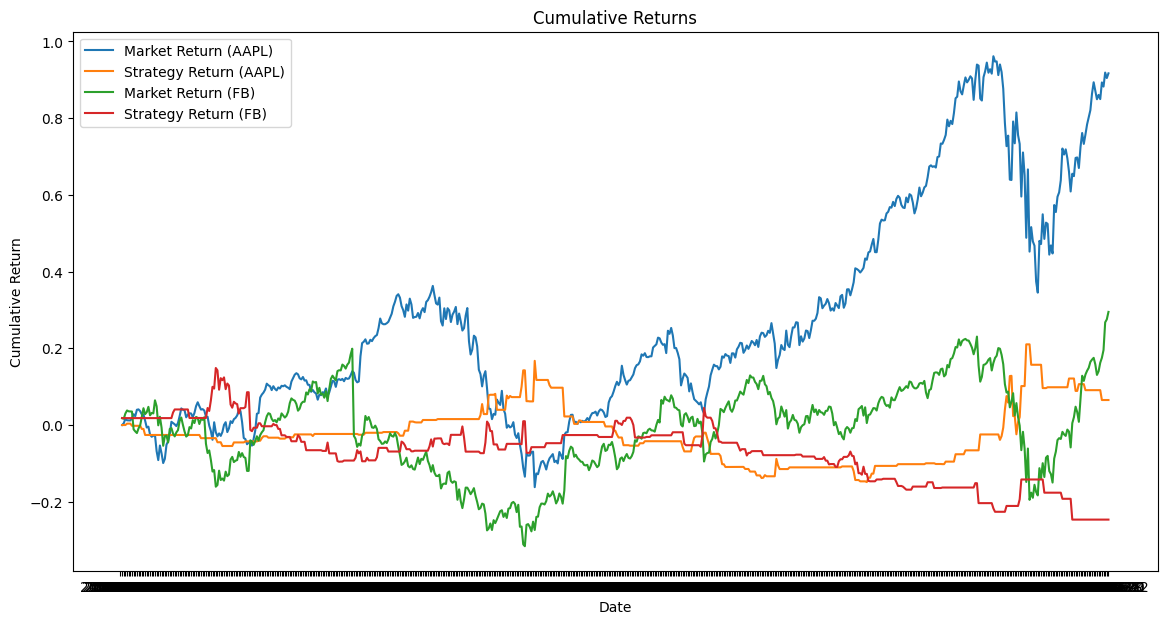

In [91]:
plt.figure(figsize=(14, 7))
plt.plot(aapl_data['Date'], aapl_data['CumulativeMarketReturn'], label='Market Return (AAPL)')
plt.plot(aapl_data['Date'], aapl_data['CumulativeStrategyReturn'], label='Strategy Return (AAPL)')
plt.plot(fb_data['Date'], fb_data['CumulativeMarketReturn'], label='Market Return (FB)')
plt.plot(fb_data['Date'], fb_data['CumulativeStrategyReturn'], label='Strategy Return (FB)')
plt.legend()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

In [92]:
def rolling_window_analysis(df, window_size=254):
    rolling_returns = []
    for start in range(0, len(df) - window_size, window_size):
        end = start + window_size
        window_df = df.iloc[start:end].copy()
        window_df = calculate_returns(window_df)
        rolling_returns.append(window_df['CumulativeStrategyReturn'].iloc[-1])
    return rolling_returns

aapl_rolling_returns_1yr = rolling_window_analysis(aapl_data, window_size=254)
aapl_rolling_returns_6mo = rolling_window_analysis(aapl_data, window_size=127)
fb_rolling_returns_1yr = rolling_window_analysis(fb_data, window_size=254)
fb_rolling_returns_6mo = rolling_window_analysis(fb_data, window_size=127)

In [93]:
print("AAPL Rolling Returns (1 Year):", aapl_rolling_returns_1yr)
print("AAPL Rolling Returns (6 Months):", aapl_rolling_returns_6mo)
print("FB Rolling Returns (1 Year):", fb_rolling_returns_1yr)
print("FB Rolling Returns (6 Months):", fb_rolling_returns_6mo)

AAPL Rolling Returns (1 Year): [0.11740519269358418, -0.19058221754113702]
AAPL Rolling Returns (6 Months): [-0.023443739005489017, 0.14423022750950887, -0.20774335394660481, 0.021661082290639122]
FB Rolling Returns (1 Year): [-0.0578919469801793, -0.11170113362288592]
FB Rolling Returns (6 Months): [-0.04577830860260024, 0.017503532576356173, -0.00550243577248688, -0.09071953312177239]


In [94]:
def performance_metrics(df):
    total_trades = df['Signal'].diff().abs().sum()
    excess_return = df['CumulativeStrategyReturn'].iloc[-1] - df['CumulativeMarketReturn'].iloc[-1]
    return total_trades, excess_return

aapl_metrics = performance_metrics(aapl_data)
fb_metrics = performance_metrics(fb_data)

print("AAPL Performance Metrics:", aapl_metrics)
print("FB Performance Metrics:", fb_metrics)

AAPL Performance Metrics: (175.0, -0.851850093557091)
FB Performance Metrics: (173.0, -0.5415998415116393)


In [95]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

# OLD CODE TRY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
aapl = pd.read_csv('data/AAPL.csv', index_col='Date', parse_dates=['Date'])
fb = pd.read_csv('data/FB.csv', index_col='Date', parse_dates=['Date'])

aapl.drop(columns = ['Unnamed: 0'], inplace = True)
fb.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
def compute_sentiment_indicators(data):
    data['BULL'] = data['positivePartscr'] + data['certaintyPartscr'] + data['finupPartscr']
    data['BEAR'] = data['negativePartscr'] + data['uncertaintyPartscr'] + data['findownPartscr']
    data['BBr'] = 100 * data['BULL'] / (data['BULL'] + data['BEAR'])
    data['PNlog'] = 0.5 * np.log((data['positivePartscr'] + 1) / (data['negativePartscr'] + 1))
    return data

aapl = compute_sentiment_indicators(aapl)
fb = compute_sentiment_indicators(fb)

In [ ]:
display(aapl.head())
display(fb.head())

,Open,High,Low,Close,Adj Close,Volume,RVT,positivePartscr,negativePartscr,fearPartscr,findownPartscr,finupPartscr,finhypePartscr,certaintyPartscr,uncertaintyPartscr,BULL,BEAR,BBr,PNlog
Date,,,,,,,,,,,,,,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,166.353714,25555900,0.0023,0.0182,0.0137,0.0020,0.0043,0.0256,0.0314,0.0117,0.0167,0.0555,0.0347,61.529933,0.002215
2018-01-03,172.529999,174.550003,171.960007,172.229996,166.324722,29517900,0.0010,0.0158,0.0180,0.0022,0.0044,0.0350,0.0174,0.0090,0.0136,0.0598,0.0360,62.421712,-0.001082
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.097290,22434600,0.0012,0.0131,0.0264,0.0002,0.0078,0.0167,0.0129,0.0078,0.0057,0.0376,0.0399,48.516129,-0.006521
2018-01-05,173.440002,175.369995,173.050003,175.000000,168.999741,23660000,0.0023,0.0108,0.0423,0.0024,0.0105,0.0171,0.0131,0.0079,0.0091,0.0358,0.0619,36.642784,-0.015344
2018-01-08,174.350006,175.610001,173.929993,174.350006,168.372040,20567800,0.0015,0.0202,0.0196,0.0036,0.0052,0.0186,0.0174,0.0114,0.0098,0.0502,0.0346,59.198113,0.000294


,Open,High,Low,Close,Adj Close,Volume,RVT,positivePartscr,negativePartscr,fearPartscr,findownPartscr,finupPartscr,finhypePartscr,certaintyPartscr,uncertaintyPartscr,BULL,BEAR,BBr,PNlog
Date,,,,,,,,,,,,,,,,,,,
2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900,0.0018,0.0103,0.0126,0.0000,0.0029,0.0332,0.0118,0.0185,0.0052,0.0620,0.0207,74.969770,-0.001137
2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600,0.0006,0.0116,0.0088,0.0000,0.0058,0.0379,0.0102,0.0218,0.0102,0.0713,0.0248,74.193548,0.001386
2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900,0.0009,0.0136,0.0399,0.0051,0.0051,0.0306,0.0068,0.0111,0.0136,0.0553,0.0586,48.551361,-0.012808
2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500,0.0006,0.0216,0.0492,0.0072,0.0072,0.0252,0.0060,0.0048,0.0108,0.0516,0.0672,43.434343,-0.013329
2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700,0.0008,0.0192,0.0192,0.0000,0.0026,0.0224,0.0243,0.0109,0.0083,0.0525,0.0301,63.559322,0.000000


In [ ]:
def trading_strategy(data, threshold=50):
    data['Signal'] = 0
    data.loc[data['BBr'] > threshold, 'Signal'] = 1
    data.loc[data['BBr'] < threshold, 'Signal'] = -1
    return data

aapl = trading_strategy(aapl)
fb = trading_strategy(fb)

In [ ]:
display(aapl.head())
display(fb.head())

,Open,High,Low,Close,Adj Close,Volume,RVT,positivePartscr,negativePartscr,fearPartscr,findownPartscr,finupPartscr,finhypePartscr,certaintyPartscr,uncertaintyPartscr,BULL,BEAR,BBr,PNlog,Signal
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,166.353714,25555900,0.0023,0.0182,0.0137,0.0020,0.0043,0.0256,0.0314,0.0117,0.0167,0.0555,0.0347,61.529933,0.002215,1
2018-01-03,172.529999,174.550003,171.960007,172.229996,166.324722,29517900,0.0010,0.0158,0.0180,0.0022,0.0044,0.0350,0.0174,0.0090,0.0136,0.0598,0.0360,62.421712,-0.001082,1
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.097290,22434600,0.0012,0.0131,0.0264,0.0002,0.0078,0.0167,0.0129,0.0078,0.0057,0.0376,0.0399,48.516129,-0.006521,-1
2018-01-05,173.440002,175.369995,173.050003,175.000000,168.999741,23660000,0.0023,0.0108,0.0423,0.0024,0.0105,0.0171,0.0131,0.0079,0.0091,0.0358,0.0619,36.642784,-0.015344,-1
2018-01-08,174.350006,175.610001,173.929993,174.350006,168.372040,20567800,0.0015,0.0202,0.0196,0.0036,0.0052,0.0186,0.0174,0.0114,0.0098,0.0502,0.0346,59.198113,0.000294,1


,Open,High,Low,Close,Adj Close,Volume,RVT,positivePartscr,negativePartscr,fearPartscr,findownPartscr,finupPartscr,finhypePartscr,certaintyPartscr,uncertaintyPartscr,BULL,BEAR,BBr,PNlog,Signal
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900,0.0018,0.0103,0.0126,0.0000,0.0029,0.0332,0.0118,0.0185,0.0052,0.0620,0.0207,74.969770,-0.001137,1
2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600,0.0006,0.0116,0.0088,0.0000,0.0058,0.0379,0.0102,0.0218,0.0102,0.0713,0.0248,74.193548,0.001386,1
2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900,0.0009,0.0136,0.0399,0.0051,0.0051,0.0306,0.0068,0.0111,0.0136,0.0553,0.0586,48.551361,-0.012808,-1
2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500,0.0006,0.0216,0.0492,0.0072,0.0072,0.0252,0.0060,0.0048,0.0108,0.0516,0.0672,43.434343,-0.013329,-1
2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700,0.0008,0.0192,0.0192,0.0000,0.0026,0.0224,0.0243,0.0109,0.0083,0.0525,0.0301,63.559322,0.000000,1


In [ ]:
def performance(x, ntrades=1, cost=0):
    cumRetx = np.cumsum(x, axis=0) - ntrades * cost
    annRetx = (np.power(cumRetx[-1] + 1, 252 / len(x)) - 1)
    sharpex = annRetx / np.std(x, ddof=1) * np.sqrt(252)
    winpctx = np.count_nonzero(x > 0) / np.count_nonzero(x)
    annSDx = np.std(x, ddof=1) * np.sqrt(252)

    DDs = np.minimum.accumulate(cumRetx) - cumRetx
    maxDDx = DDs.min()
    maxLx = (cumRetx == DDs).argmax()

    Perf = np.array([cumRetx[-1], annRetx, sharpex, winpctx, annSDx, maxDDx, maxLx, ntrades])
    names = np.array(["Cumulative Return", "Annual Return", "Annualized Sharpe Ratio",
                        "Win %", "Annualized Volatility", "Maximum Drawdown", "Max Length Drawdown", "n.trades"])
    return pd.Series(Perf, index=names, name='Performance')

In [ ]:
def backtest(data, window_size, tcost=0):
    results = []
    ntrades = 0
    strategy_returns = []
    for start in range(0, len(data) - window_size + 1):
        end = start + window_size
        window_data = data.iloc[start:end].copy()
        window_data['Return'] = window_data['Adj Close'].pct_change()
        window_data['Signal'] = window_data['Signal'].shift(1)
        window_data.dropna(inplace=True)
        window_data['StrategyReturn'] = window_data['Return'] * window_data['Signal']
        ntrades += window_data['Signal'].diff().abs().sum() / 2  # Number of trades
        strategy_returns.extend(window_data['StrategyReturn'].values)
    strategy_returns = pd.Series(strategy_returns, name='StrategyReturn')
    return performance(strategy_returns, ntrades, tcost)

In [ ]:
window_size_1y = 254
window_size_6m = 127

aapl_results_1y = backtest(aapl, window_size_1y, tcost=0.01)
aapl_results_6m = backtest(aapl, window_size_6m, tcost=0.01)

fb_results_1y = backtest(fb, window_size_1y, tcost=0.01)
fb_results_6m = backtest(fb, window_size_6m, tcost=0.01)

KeyError: -1

In [ ]:
print("AAPL Results (1 year window):")
print(aapl_results_1y)
print("\nAAPL Results (6 months window):")
print(aapl_results_6m)
print("\nFB Results (1 year window):")
print(fb_results_1y)
print("\nFB Results (6 months window):")
print(fb_results_6m)

AAPL Results (1 year window): (0.03261913895109698, 0.12080948713726346)
AAPL Results (6 months window): (0.034180946479826994, 0.11904983923917872)
FB Results (1 year window): (-0.07940777098961131, 0.1353956776433281)
FB Results (6 months window): (-0.027097800232584703, 0.18638161105252077)


In [ ]:
def plot_signals(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price')
    plt.plot(data.index, data['Signal'], label='Signal', alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()

plot_signals(aapl, 'AAPL Trading Signals')
plot_signals(fb, 'FB Trading Signals')